<h1 align="center">Heart Attack - EDA</h1>

1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Task](#3)
    - 1.3 [Understanding Data](#21)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
5. [Modeling](#15)
    - 5.1 [Linear Classifiers](#16)
    - 5.2 [Tree Models](#17)
    

### 1. Introduction <a id=1></a>

#### 1.1 Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

**Additional Variables Explaination from Kaggle**

**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

    Variable definition can be found in the discussion section

#### 1.2 Task <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

#### 1.3 Understanding Data <a id=21></a>
* What is Heart Attack?





* How does it Happen?




* What are the most contributing Factors for heart attack to happen ?



* symptoms of heart attack for male and female?


### 2. Preparation <a id=4></a>

#### 2.1 Packages <a id=5></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline
sns.set() 
import requests


#### 2.2 Data <a id=6></a>

In [2]:
import os
os.getcwd()

'C:\\Users\\user\\ML-projects\\ML_Proejcts\\Heart Attack Template'

In [3]:
def get_link(url):
    file_name = url.split('/')[-1]
    response = requests.get(url,allow_redirects=True) 
    if not os.path.isfile(file_name):
        with open(file_name, mode = 'wb') as file:
            file.write(response.content)
            


In [4]:
#dowenload datasets from Ucsi repo 
cleveland = get_link('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data')
hungarian = get_link('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data')
switzerland = get_link('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data')
va = get_link('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data')

In [5]:
df_clv = pd.read_csv("processed.cleveland.data" ,header = None)
df_hun = pd.read_csv("processed.hungarian.data" ,header = None)
df_sw = pd.read_csv("processed.switzerland.data" ,header = None)
df_va = pd.read_csv("processed.va.data" ,header = None)


#### creating function to append columns 


In [6]:
def append_columns(df):
    columns = [['age','sex','cp','trestbps','chol','fbs','restecg' ,'thalach','eaxng' ,'oldpeak','slope','ca','thal','output']]
    for col in columns:
        df.columns=col

In [7]:
#let's append columns 
data_frames= [df_clv ,df_hun ,df_sw,df_va]
for df in data_frames:
    append_columns(df) 
    
    

#### define fuction to add location

In [8]:
def add_location(df , place):
        df['place'] = place


In [9]:
add_location(df_clv ,'clev')
add_location(df_hun , 'hun')
add_location(df_sw , 'sw')
add_location(df_va , 'va')

### Concating all dataframes together 

In [10]:
df = pd.concat([df_clv, df_hun ,df_sw ,df_va], ignore_index=True)
pd.set_option('display.max_rows', None)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,slope,ca,thal,output,place
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0,clev
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2,clev
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1,clev
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0,clev
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0,clev
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,1,0.0,3.0,0,clev
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,2.0,3.0,3,clev
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,1,0.0,3.0,0,clev
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,1.0,7.0,2,clev
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,3,0.0,7.0,1,clev


#### 2.3 Understanding Data 

##### 2.3.1 The shape of the data

In [11]:
df.shape

(920, 15)

##### 2.3.2 Preview random 5 rows of the data

In [12]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,slope,ca,thal,output,place
897,64.0,1.0,4.0,130,258,1,2,130,0,0,?,?,6,2,va
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2,clev
33,59.0,1.0,4.0,135,234,0,0,161,0,0.5,2,0.0,7.0,0,clev
254,43.0,1.0,4.0,115,303,0,0,181,0,1.2,2,0.0,3.0,0,clev
745,69.0,1.0,4.0,130,0,1,1,129,0,1,2,?,6,2,va



##### 2.3.3 Checking the number of unique values in each column

In [13]:
for i in df.columns:
    print(pd.DataFrame(df[i].value_counts()))



      age
54.0   51
58.0   43
55.0   41
56.0   38
57.0   38
52.0   36
51.0   35
62.0   35
59.0   35
53.0   33
60.0   32
61.0   31
48.0   31
63.0   30
50.0   25
46.0   24
41.0   24
43.0   24
49.0   22
64.0   22
65.0   21
47.0   19
44.0   19
42.0   18
45.0   18
38.0   16
39.0   15
67.0   15
40.0   13
66.0   13
69.0   13
37.0   11
35.0   11
68.0   10
74.0    7
70.0    7
34.0    7
36.0    6
71.0    5
32.0    5
72.0    4
29.0    3
75.0    3
31.0    2
33.0    2
76.0    2
77.0    2
30.0    1
28.0    1
73.0    1
     sex
1.0  726
0.0  194
      cp
4.0  496
3.0  204
2.0  174
1.0   46
       trestbps
120          94
130          79
140          70
?            59
110          40
150          39
160          39
120.0        37
130.0        36
140.0        32
110.0        19
125          18
150.0        17
115          16
138.0        12
128.0        12
135          12
145          11
125.0        11
100          11
160.0        11
170          10
112.0         9
180           9
122           8
13

In [14]:
df.nunique()

age          50
sex           2
cp            4
trestbps    103
chol        336
fbs           5
restecg       7
thalach     198
eaxng         5
oldpeak      82
slope         7
ca            8
thal          7
output        5
place         4
dtype: int64

##### 2.3.4 Separating the columns in categorical and continuous

##### 2.3.5 Summary statistics

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920.0,0.789130,0.408148,0.0,1.0,1.0,1.0,1.0
cp,920.0,3.250000,0.930969,1.0,3.0,4.0,4.0,4.0
output,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


In [16]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,slope,ca,thal,output,place
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0,clev
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2,clev
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1,clev


In [17]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920,NaN,NaN,NaN,53.5109,9.42469,28,47,54,60,77
sex,920,NaN,NaN,NaN,0.78913,0.408148,0,1,1,1,1
cp,920,NaN,NaN,NaN,3.25,0.930969,1,3,4,4,4
trestbps,920,103,120,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,920,336,0,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,920,5,0,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,7,0,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,920,198,?,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eaxng,920,5,0,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,920,82,0,288,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 2.3.6 Missing values

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
eaxng       0
oldpeak     0
slope       0
ca          0
thal        0
output      0
place       0
dtype: int64

##### 2.3.6 dupicated  values

In [19]:
df.duplicated().any()

True

## Handlling errors and  missing values 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   eaxng     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  output    920 non-null    int64  
 14  place     920 non-null    object 
dtypes: float64(3), int64(1), object(11)
memory usage: 107.9+ KB


In [21]:
for i in df.columns:
    print(pd.DataFrame(df[i].value_counts()))

      age
54.0   51
58.0   43
55.0   41
56.0   38
57.0   38
52.0   36
51.0   35
62.0   35
59.0   35
53.0   33
60.0   32
61.0   31
48.0   31
63.0   30
50.0   25
46.0   24
41.0   24
43.0   24
49.0   22
64.0   22
65.0   21
47.0   19
44.0   19
42.0   18
45.0   18
38.0   16
39.0   15
67.0   15
40.0   13
66.0   13
69.0   13
37.0   11
35.0   11
68.0   10
74.0    7
70.0    7
34.0    7
36.0    6
71.0    5
32.0    5
72.0    4
29.0    3
75.0    3
31.0    2
33.0    2
76.0    2
77.0    2
30.0    1
28.0    1
73.0    1
     sex
1.0  726
0.0  194
      cp
4.0  496
3.0  204
2.0  174
1.0   46
       trestbps
120          94
130          79
140          70
?            59
110          40
150          39
160          39
120.0        37
130.0        36
140.0        32
110.0        19
125          18
150.0        17
115          16
138.0        12
128.0        12
135          12
145          11
125.0        11
100          11
160.0        11
170          10
112.0         9
180           9
122           8
13

In [22]:
df = df.drop(['ca' ,'thal','slope'] ,axis=1)


In [23]:
pd.set_option('display.max_rows', None)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,output,place
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,0,clev
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,clev
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,1,clev
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,0,clev
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,0,clev
5,56.0,1.0,2.0,120,236,0,0,178,0,0.8,0,clev
6,62.0,0.0,4.0,140,268,0,2,160,0,3.6,3,clev
7,57.0,0.0,4.0,120,354,0,0,163,1,0.6,0,clev
8,63.0,1.0,4.0,130,254,0,2,147,0,1.4,2,clev
9,53.0,1.0,4.0,140,203,1,2,155,1,3.1,1,clev


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   eaxng     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  output    920 non-null    int64  
 11  place     920 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 86.4+ KB


In [25]:
for i in df.columns:
    print(pd.DataFrame(df[i].value_counts()))

      age
54.0   51
58.0   43
55.0   41
56.0   38
57.0   38
52.0   36
51.0   35
62.0   35
59.0   35
53.0   33
60.0   32
61.0   31
48.0   31
63.0   30
50.0   25
46.0   24
41.0   24
43.0   24
49.0   22
64.0   22
65.0   21
47.0   19
44.0   19
42.0   18
45.0   18
38.0   16
39.0   15
67.0   15
40.0   13
66.0   13
69.0   13
37.0   11
35.0   11
68.0   10
74.0    7
70.0    7
34.0    7
36.0    6
71.0    5
32.0    5
72.0    4
29.0    3
75.0    3
31.0    2
33.0    2
76.0    2
77.0    2
30.0    1
28.0    1
73.0    1
     sex
1.0  726
0.0  194
      cp
4.0  496
3.0  204
2.0  174
1.0   46
       trestbps
120          94
130          79
140          70
?            59
110          40
150          39
160          39
120.0        37
130.0        36
140.0        32
110.0        19
125          18
150.0        17
115          16
138.0        12
128.0        12
135          12
145          11
125.0        11
100          11
160.0        11
170          10
112.0         9
180           9
122           8
13

In [26]:
df = df.replace('?', np.NaN)


In [27]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalach     55
eaxng       55
oldpeak     62
output       0
place        0
dtype: int64

In [28]:
df['output'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: output, dtype: int64

### handlling error in target column 


In [29]:
df['output'] = df['output'].apply(lambda x:1 if x >=1 else 0)

In [30]:
df['output'].value_counts()

1    509
0    411
Name: output, dtype: int64

### imputing missing values using machine learning 

In [308]:
df.drop('place',inplace=True ,axis=1)

In [350]:
df.sample()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,slope,ca,thal,output,place
659,56.0,1.0,4.0,140,0,?,0,121,1,1.8,1,?,?,1,sw


In [ ]:
x

In [35]:
x=df.iloc[: , :-1].values
x


array([[63.0, 1.0, 1.0, ..., 0.0, 2.3, 0],
       [67.0, 1.0, 4.0, ..., 1.0, 1.5, 1],
       [67.0, 1.0, 4.0, ..., 1.0, 2.6, 1],
       ...,
       [55.0, 1.0, 4.0, ..., '0', '0', 1],
       [58.0, 1.0, 4.0, ..., nan, nan, 0],
       [62.0, 1.0, 2.0, ..., '1', '0', 1]], dtype=object)

In [36]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
x=knn_imputer.fit_transform(x)


In [37]:
np.isnan(x).any() 

False

In [39]:
df =pd.DataFrame(data=x, columns=df.columns[0:-1])

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,eaxng,oldpeak,output
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0


In [41]:
df.shape

(920, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   eaxng     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  output    920 non-null    float64
dtypes: float64(11)
memory usage: 79.2 KB


In [317]:
cat_feature = df[['sex','cp','fbs','restecg','eaxng']]
cat_feature.sample()

,sex,cp,fbs,restecg,eaxng
719,1.0,2.0,0.322096,1.0,0.0


In [318]:
cont_fetaure =df[['age','trestbps','chol','thalach','oldpeak']]
cont_fetaure.sample()


,age,trestbps,chol,thalach,oldpeak
456,54.0,120.0,217.0,137.0,0.0


### 3. Exploratory Data Analysis <a id=8></a>

#### 3.1 Univariate Analysis <a id=9></a>

##### 3.1.1 Count plot of categorical features

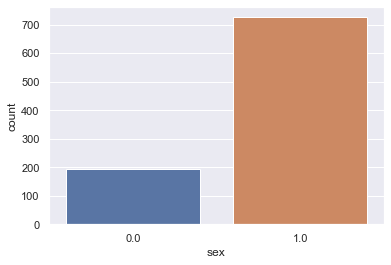

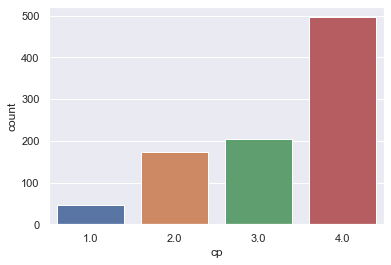

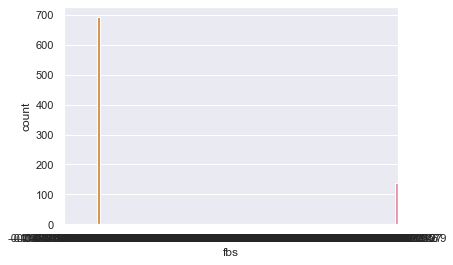

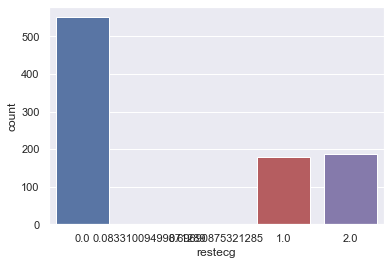

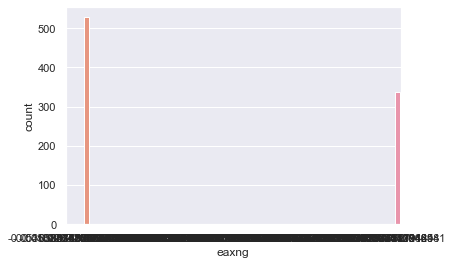

In [319]:
for i in cat_feature:
    sns.countplot(df[i])
    plt.show();

##### 3.1.2 Boxen plot of continuous features

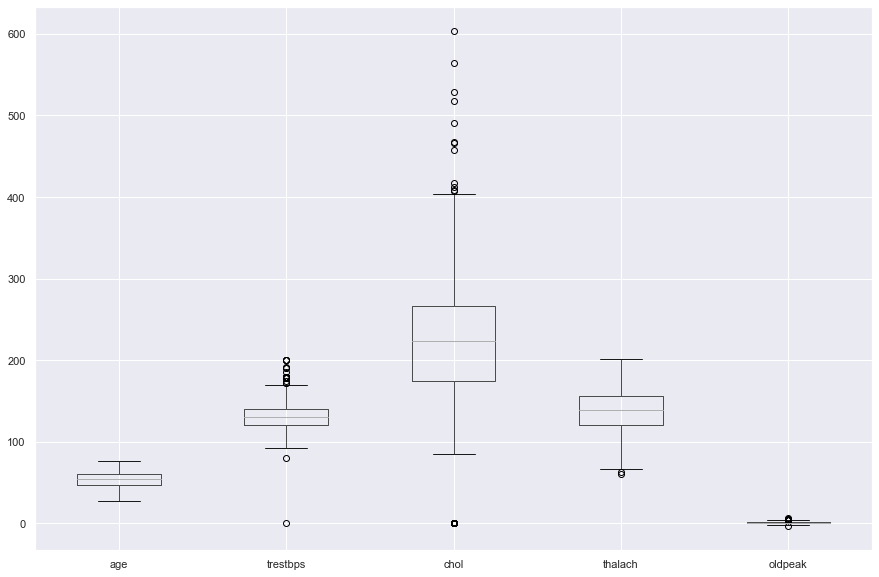

In [320]:
plt.figure(figsize=(15,10))
cont_fetaure.boxplot();
plt.show()

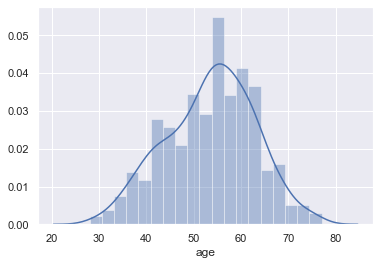

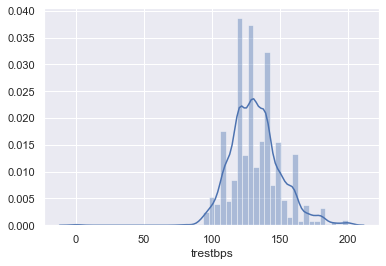

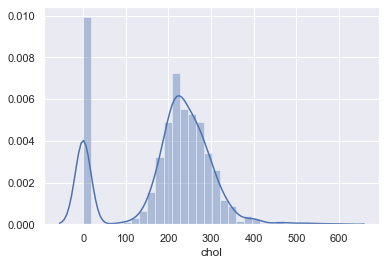

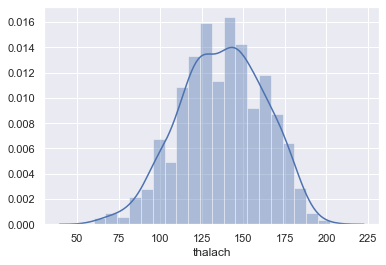

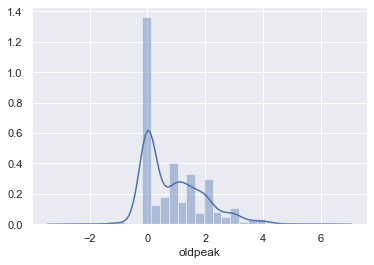

In [321]:
for i in cont_fetaure:
    sns.distplot(df[i])
    plt.show()

##### 3.1.2 Count plot of target

#### 3.2 Bivariate Analysis <a id=10></a>

##### 3.2.1 Correlation matrix of continuous features

In [322]:
cont_fetaure.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.253097,-0.091243,-0.373265,0.261066
trestbps,0.253097,1.000000,0.098393,-0.109084,0.164549
chol,-0.091243,0.098393,1.000000,0.240916,0.053246
thalach,-0.373265,-0.109084,0.240916,1.000000,-0.156228
oldpeak,0.261066,0.164549,0.053246,-0.156228,1.000000


##### 3.2.2 Scatterplot heatmap of dataframe

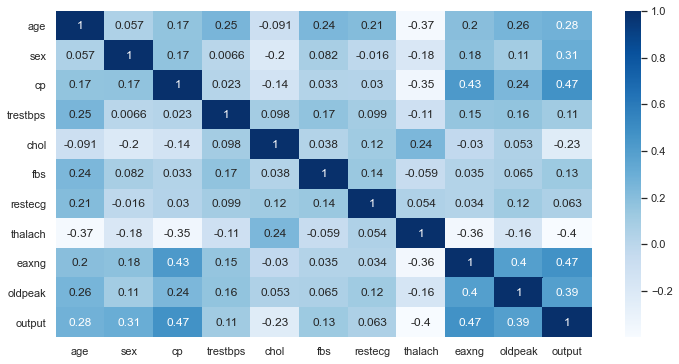

In [323]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True , cmap='Blues')

##### 3.2.3 Distribution of continuous features according to target variable

##### 3.2.4 Some other relations that seemed intuitive

##### 3.2.5 Pairplot according to target variable - one plot to rule them all

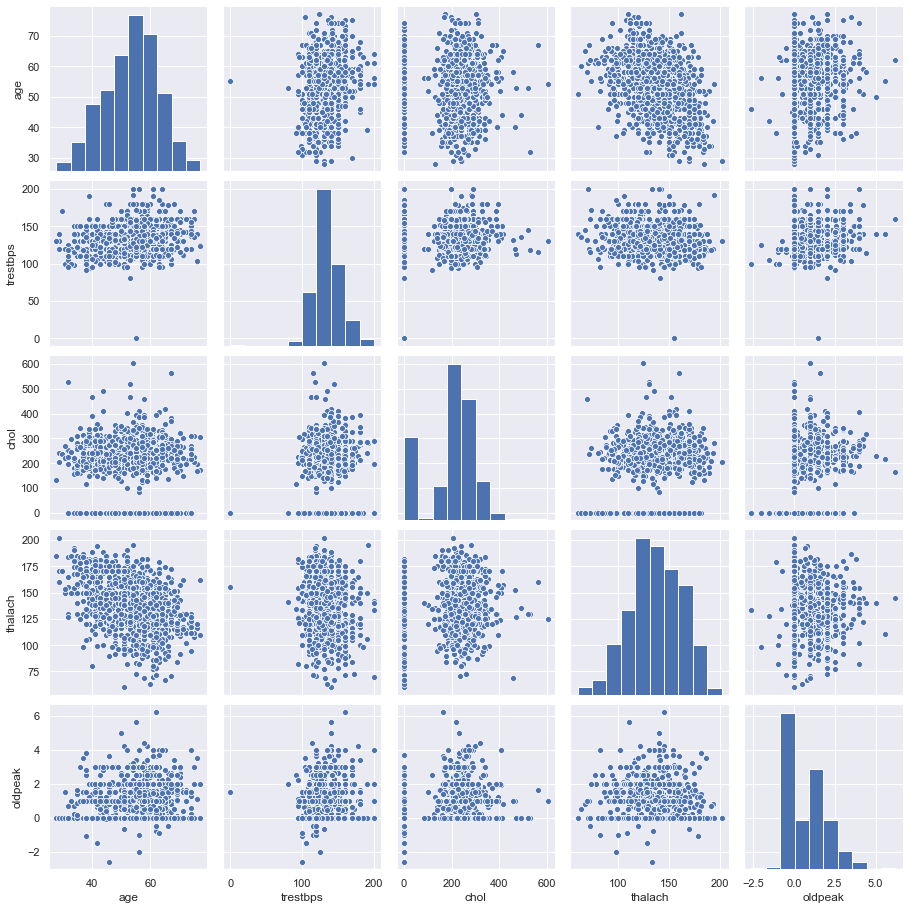

In [324]:
sns.pairplot(cont_fetaure, kind="scatter")
plt.show()

### 4. Data Preprocessing <a id=11></a>

#### 4.1 Conclusions from the EDA <a id=12></a>


#### 4.2 Packages <a id=13></a>


#### 4.3 Making features model ready <a id=14></a>

##### 4.3.1 Scaling and Encoding features

In [45]:
X=df.iloc[:, :-1].values
X

array([[ 63. ,   1. ,   1. , ..., 150. ,   0. ,   2.3],
       [ 67. ,   1. ,   4. , ..., 108. ,   1. ,   1.5],
       [ 67. ,   1. ,   4. , ..., 129. ,   1. ,   2.6],
       ...,
       [ 55. ,   1. ,   4. , ..., 100. ,   0. ,   0. ],
       [ 58. ,   1. ,   4. , ..., 123.6,   0.4,   0.6],
       [ 62. ,   1. ,   2. , ...,  93. ,   1. ,   0. ]])

In [46]:
Y = df.iloc[: , -1].to_numpy()
Y

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X= sc.fit_transform(X)

##### 4.3.2 Train and test split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y ,test_size=.2 , random_state=42)

### 5. Modeling <a id=15></a>

#### 5.1 Linear Classifiers <a id=16></a>

##### 5.1.1 Support Vector Machines

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
score = []
kernel = ['linear' , 'rbf' , 'sigmoid','poly']
for k in kernel:
  model = SVC(kernel=k , degree=3, gamma='scale')
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  score.append(accuracy_score(y_pred , y_test))


##### 5.1.2 Hyperparameter tuning of SVC

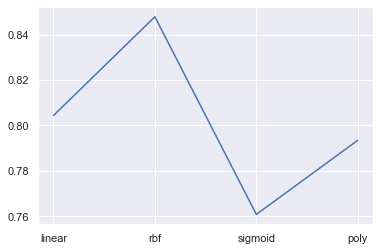

In [51]:
plt.plot(range(len(kernel)) , score )
plt.xticks(labels=kernel ,ticks=range(len(kernel)));


In [52]:
score = []
c= [1,10 ,100 ,1000]
for i in c:
  model = SVC(C=i , kernel='rbf', degree=3, gamma='auto')
  model.fit(X_train ,y_train)
  y_pred = model.predict(X_test)
  score.append(accuracy_score(y_pred , y_test))

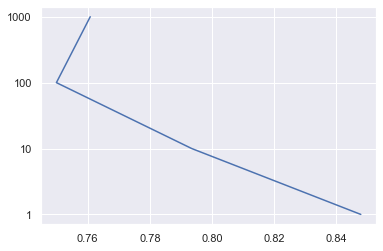

In [53]:
plt.plot(score,range(len(c)))
plt.yticks(labels=c ,ticks=range(len(c)));


In [54]:
model = SVC(kernel='rbf' , degree=1, gamma='auto', C=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred , y_test)

0.8478260869565217

##### 5.1.3 Logistic Regression

#### 5.2 Tree Models <a id=17></a>

##### 5.2.1 Decision Tree

##### 5.2.2 Random Forest

#### Conclusion on Algorithms and final outcome